<img src="../figures/logos/logo_usc.jpg" align=right width='80px'/>
<br>

<table width="100%">
<td style="font-size:40px;font-style:italic;text-align:left;background-color:rgba(0, 220, 170,0.7)">
Search Algorithms
</td></table>


$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\cal H}} $
$ \newcommand{\cg}[1]{{\rm C}#1} $



In [33]:
import sys
sys.path.append('../')
import macro_tQ as tQ
import numpy as np

Imagine you sit in front of a stack of keys, all looking similar, with a locker in your hand. 

If you want to find the one that makes it open, there is no better way than try one after the other until you find it.  

This is an example of an unstructured database search.

 Another one is the phone book. 

If you want to find a phone number from a name, this is an *alphabetically structured database* search.

Conversely, finding the user to whom a certain phone belongs is an *unstructured* search. 

If there are $N$ phones, the average number of times we will have to query the database will grow as $N$. This is the classical complexity of this problem

**Grover's algorithm** is a search strategy that allows to reduce the complexity to ${\cal O}(\sqrt{N})$.


The gain, therefore, is not exponential, as in the case of the quantum Fourier transform. It is not easy to know *a priori* whether an algorithm will have an exponential gain or not.


<div class="alert alert-block alert-success">
<b>Grover's problem:</b> 
<br>
    
- *Promise*: we have an oracle  $f : S_n \to \{0,1\}$ such that
<br>
\begin{align}
f(w) &= 1 \nonumber\\
f(x) &= 0 ~~~\forall x\neq w 
\end{align}
where $x,w\in S_n$. 
<br>
<br>    
- *Problem*: find $w$
</div>


- here $f(x)$ plays the role of the locker. You can use it at will, but not open it and look at its gears.
<br>

- $w$ would be the key that opens it. 

## Grover's Plan

Our *database*: $x\in S_n$ becomes the *computational basis* of $n$ qubits, $\{\ket{x}\}$ 

The *needle in the haystack* is  a certain vector $\ket{w}$ 
(as for now, we will assume it is unique)

As usual, the quantum strategy begins by introducing a uniform superposition of the $N = 2^n$ basis elements

\begin{equation}
\ket{s} = H^{\otimes n}\ket{0} = \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1} \ket{x}
\end{equation}

Let's define the unit vector composed of the *uniform superposition* of the elements that **are not a solution**

$$\ket{s^{\prime}} = \frac{1}{\sqrt{N-1}} \sum_{x \neq w} \ket{x}$$
Clearly $\braket{\omega}{s'} = 0$ are orthogonal

We can rewrite $\ket{s}$ in a more convenient form.


\begin{eqnarray}
\ket{s} = \frac{1}{\sqrt{N}}\sum_x \ket{x}  ~&=& ~
 \frac{1}{\sqrt{N}} \ket{w} + \frac{1}{\sqrt{N}} \sum_{x \neq w} \ket{x}   
\end{eqnarray}

define the *unit vector*
$$
\ket{s'} = \frac{1}{\sqrt{N-1}}\sum_{x \neq w} \ket{x} 
$$

we find

\begin{eqnarray}
\ket{s} =  \frac{1}{\sqrt{N}} \ket{w} + \sqrt{\frac{N-1}{N}} \ket{s^\prime}.
\end{eqnarray}



That means that:
- we can think of a 2-dimensional subspace (a *plane*) formed by the two vectors $\{\ket{w},\ket{s'}\}$


- in that plane, our state $\ket{s}$ is a vector 

$$\ket{s} = \sin{\theta}\ket{w} + \cos{\theta}\ket{s^\prime}$$

  characterized by the angle $\sin\theta = \frac{1}{\sqrt{N}}$, 


<br>
<figure>
<a id='fig_ref'></a>
<img src="./images/Grover1.png" width="70%" style="margin:auto"/>    
<center></center>
</figure>
<br>

<div class="alert alert-block alert-danger">
    <b>Note</b>: 

- the angle decreases with the size $N$ of the database. This angle is the probability amplitude of finding the solution $\ket{w}$ after a measurement of $\ket{s}$.
    
- For $N\to \infty$ we have that $\theta \sim 1/\sqrt{N}$
</div>

## Amplitude Amplification

The strategy is based on **iterating** a series of operations that *amplify the amplitude* of obtaining the state $\ket{w}$.

Geometrically, each *Grover iteration* is a composition of two [*reflectors*](../00_Formalismo/01_Operadores.ipynb#reflect) $~
\fbox{$G = R_{s_\perp} R_w$}
~$, where
<br>
-  **the marker**, $R_w$, produces a reflection in the direction  *parallel*  to $\ket{w}$

$$
R_w\ket{s} ~=~ \left( I - 2\ket{w}\bra{w}\rule{0mm}{8mm}\right)\ket{s} ~ = ~ -\frac{1}{\sqrt{N}} \ket{w} + \sqrt{\frac{N-1}{N}} \ket{s^\prime}
$$


<br>
<figure>
<a id='fig_ref'></a>
<img src="./images/Grover2.png" width="70%" style="margin:auto"/>
<center></center>
</figure>
<br>

<div class="alert alert-block alert-danger">
<b> Observe: </b> 
The marker is the part of the algorithm that <i>knows</i> the solution. 
<br> 
    We can formalize the <i>marker</i> as the <i>oracle query</i> $O_f$ associated with a function that <i>recognizes</i> the solution when it sees it.
<br>
<br>
\begin{equation}
f_w(x) = \left\{ \begin{array}{lcc}
             1 &   \hbox{if}  & x = w \\
              0 &  \hbox{if} & x \neq w \end{array}
   \right..
\end{equation}

 
    
The implementation of this function is trivial because it only contains a <i>min-term</i> $f_w(x=w)=1$. We can
    implement this function as a <i>phase oracle</i>, preparing the ancilla in the state $\ket{-}$
$$
O_{f_w} \ket{x}\ket{-} = (-1)^{f_w(x)}\ket{x}\ket{-} ~= ~ \left\{ \begin{array}{lcc}
             -\ket{x}\ket{-} &   \hbox{if}  & x = w \\ \rule{0mm}{6mm}
              \, ~~\ket{x}\ket{-} &  \hbox{if} & x \neq w \end{array}
   \right..
$$

In summary, each reflection $U_w$ is equivalent to an oracle query.
    
</b>


-   **The diffuser**, $ R_{s_\perp}$, is a reflector parallel to $\ket{s_\perp}$, that is, perpendicular to the initial state $\ket{s}$. It is a result that $R_{s_\perp} = - R_{s}$
$$
R_{s_\perp} =  I - 2\ket{s_\perp}\bra{s_\perp}  =   2\ket{s}\bra{s}- I  = - R_s
$$


<br>
<figure>
<a id='fig_ref'></a>
<img src="./images/Grover3.png" width="70%" style="margin:auto"/>
<center></center>
</figure>
<br>

In the illustrations, we have represented the effect of a first iteration of Grover $G = R_{s_\perp} R_w$ acting on the vector $\ket{s}$.

We observe that:

- the resulting vector undergoes a rotation of angle $2\theta$ in the plane $\{\ket{w},\ket{s'}\}$.

- this fact does not depend on how $\ket{s}$ is, therefore: it is true *for each iteration* $G$ of Grover.

<details>
<summary><p style="color:blue"> >> Proof </p></summary>
    
The proof consists of relating the resulting vectors from applying the Grover operator $k$ and $k-1$ times.
In general, we will have that 

$$
G^k\ket{s}  = a_k\ket{w} + b_k \ket{s^\prime}
$$

for certain coefficients $a_k, b_k$. Now we operate

\begin{eqnarray}
G^k\ket{s} & = &a_k\ket{w} + b_k \ket{s^\prime} \\
&=& -U_sU_w\left(a_{k-1}\ket{w} + b_{k-1} \ket{s^\prime}\right) \\
&=& \left( 2 \ket{s}\bra{s} -I \right)\left(-a_{k-1}\ket{w} + b_{k-1}\ket{s^\prime}\right)\\
&=& \left(a_{k-1}\ket{w} - b_{k-1}\ket{s^\prime}\right) + 2\ket{s} \left(-a_{k-1}\braket{s}{w}+b_{k-1}\braket{s}{s^\prime}\right) \\
&=& a_{k-1}\ket{w} - b_{k-1}\ket{s^\prime} + 2\left(\frac{1}{\sqrt{N}}\ket{w} + \sqrt{\frac{N-1}{N}}\ket{s^\prime}\right) \left(-a_{k-1}\frac{1}{\sqrt{N}}+b_{k-1}\sqrt{\frac{N-1}{N}}\right) \\
&=&\left(a_{k-1} - \frac{2}{N} a_{k-1} + 2\frac{\sqrt{N-1}}{N}\right)\ket{w} + \left(b_{k-1} - 2\frac{\sqrt{N-1}}{N}a_{k-1} + 2\frac{N-1}{N}b_{k-1}\right)\ket{s^\prime}.
\end{eqnarray}
    
Grouping terms, this equation can be written in matrix form as

$$
\begin{bmatrix}
a_k\\
b_k
\end{bmatrix}
=
\begin{bmatrix}
\frac{N-2}{N} & 2\frac{\sqrt{N-1}}{N}\\
-2\frac{\sqrt{N-1}}{N} & \frac{N-2}{N}
\end{bmatrix}
\begin{bmatrix}
a_{k-1}\\
b_{k-1}
\end{bmatrix}.
$$
    
It is easy to see that this matrix has a unit determinant, that is, it must be a rotation matrix
    
$$\text{det}(G)=\frac{\left(N-2\right)^2}{N^2} + 4\frac{N-1}{N^2} = \frac{N^2 - 4N + 4}{N^2} + \frac{4N-4}{N^2} = 1$$
    
Recalling
    
$$\sin{\theta} = \frac{1}{\sqrt{N}}~~~\Rightarrow ~~~\cos{\theta} = \sqrt{\frac{N-1}{N}} $$

$$\cos^2{\theta} - \sin^2{\theta} = \frac{N-2}{N} = \cos{2\theta}$$
    
$$2\sin{\theta}\cos{\theta} =2\frac{\sqrt{N-2}}{N}= \sin{2\theta}$$
    
we arrive at
    
$$G=\begin{bmatrix}
\cos{2\theta} & \sin{2\theta}\\
-\sin{2\theta} & \cos{2\theta}
\end{bmatrix}$$

This is a rotation matrix that rotates an angle $2\theta$ counterclockwise. It is elementary to verify that

$$
G^2  = \begin{bmatrix}
\cos{4\theta} & \sin{4\theta}\\
-\sin{4\theta} & \cos{4\theta} 
\end{bmatrix}
\hspace{1cm}... \hspace{1cm}
G^k = \begin{bmatrix}
\cos{2k\theta} & \sin{2k\theta}\\
-\sin{2k\theta} & \cos{2k\theta}
\end{bmatrix}
$$
</details>



- the amplitude of the state $\ket{w}$ increases at the expense of the amplitudes of the other states.


## Grover's Circuit

The task now is to create circuits that implement the reflections $R_w$ and $R_s$.

We will start by reviewing the general prescription for programming these operators.

<div class="alert alert-block alert-info">
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b> Reflectors</b>
<br>
<br>    
Let $\ket{\psi}$ be a <i>preparable</i> vector in the form  $\ket{\psi} = V\ket{0}$. The reflector parallel to $\ket{\psi}$ is
<br>
<br>
$$
R_\psi = I - 2\ket{\psi}\bra{\psi} = V \left( I - 2\ket{0}\bra{0}\rule{0mm}{6mm} \right) V^\dagger = V R_0 V^\dagger
$$
</div>

So we only need a circuit for the reflector $~R_0 = I- 2\ket{0}\bra{0}~$ *parallel* to the state $\ket{0}$.

<div class="alert alert-block alert-info">
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b>Basic reflector</b>
<br>
<br>    
The following circuit implements the action of the <i>reflector</i> 
<br>
<br>
$$~~R_0 ~=~ I- 2\ket{0}\bra{0} ~=~ \sum_{x\neq 0}\ket{x}\bra{x}-\ket{0}\bra{0}$$    
<br>
<figure>
<a id='fig_ref'></a>
<img src="./images/Reflection0.png" width="20%" style="margin:auto"/>
<center></center>
</figure>
<br>
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
where the string $XZX$ can be placed on any qubit, not necessarily the last one. 
</div>

In [34]:
from qiskit.circuit.library import ZGate
from qiskit import QuantumRegister, ClassicalRegister,QuantumCircuit

def R0(n):    
    qr = QuantumRegister(n)
    qc = QuantumCircuit(qr) 
    qc.x(n-1)
    qc.append(ZGate().control(n-1,ctrl_state= 0),qr)
    qc.x(n-1)
    qcR0 =  qc.to_gate()
    qcR0.name = 'R0'
    return qcR0

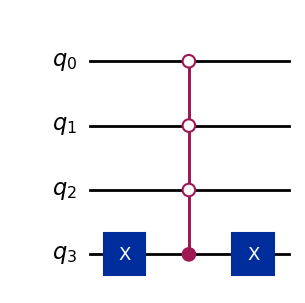

In [35]:
R0(4).definition.draw('mpl')

### Encoding the marker $O = R_w$

Starting with $R_w$, it is an operator that depends on the unknown vector $w$. Therefore, this label must appear as a hidden argument of the function that serves to construct the operator $V(w)\ket{0} = \ket{w}$.

It is simply necessary to add an operator $X$ for each $1$ that is in the binary version of $w$.

In [36]:
def Rw(n,w):        
            
    qr = QuantumRegister(n)
    qc = QuantumCircuit(qr) 
    wstring = format(int(w), 'b').zfill(n)
    for i,wi in enumerate(reversed(wstring)):
        if wi == '1':
            qc.x(qr[i])
    qc.append(R0(n),qr)        
#    qc.append(ZGate().control(n-1,ctrl_state= 0),qr) # el reflector R0
    for i,wi in enumerate(reversed(wstring)):
        if wi == '1':
            qc.x(qr[i])
    qcRw =  qc.to_gate()
    qcRw.name='Rw'
    return qcRw

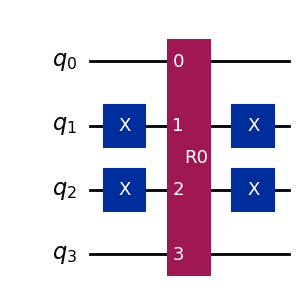

In [37]:
# Sobre un circuito de 4 cúbits, sea el estado w = 6 = 0110 

Rw(4,6).definition.draw('mpl')

### Encoding the diffuser $D = R_{s_\perp}$

Let's remember that $R_{s_\perp} = - R_s$, the *perpendicular* reflector to $\ket{s}$ is the negative of the *parallel* reflector.

Now we encode the reflector $R_s$. In this case, the operator $V:\ket{0}\to\ket{s}$ is the Walsh-Hadamard gate $V=H^{\otimes n}$

In [38]:
def Rs(n):        
            
    qr = QuantumRegister(n)
    qc = QuantumCircuit(qr) 
    qc.h(qr)
    qc.append(R0(n),qr)
    qc.h(qr)
    qcRs = qc.to_gate()
    qcRs.name='Rs'
    return qcRs

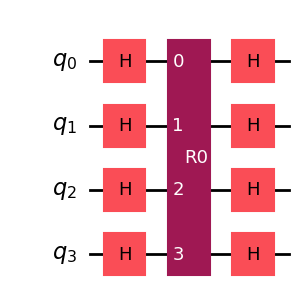

In [39]:
Rs(4).definition.draw('mpl')

With these two ingredients, we could already construct Grover's operator.

$$
 G = D \, O = -R_s  R_w
$$

<div class="alert alert-block alert-danger">
<b> Note: </b> 
<br>
we don't know how to implement $-R_s$! $~$, only $R_s$. So the closest we can get to Grover's iteration is
$
\Rightarrow  R_s R_w = - G 
$

The minus sign, in appearance, is a global phase and should not affect the final probabilities, which are their squared magnitudes. 
    
So, for now, we are going to ignore it, but we keep a note of attention on this fact.
</div>

<br>
<figure>
<a id='fig_ref'></a>
<img src="./images/Grover5.png" align=center width='50%'/>
<center></center>
</figure>
<br>

In [40]:

def G(n,w):                    
    qr = QuantumRegister(n)
    qc = QuantumCircuit(qr) 

    qc.append(Rw(n,w),qr)
    qc.append(Rs(n),qr)
    
    qcG=qc.to_gate()
    qcG.name='-G'
    return qcG


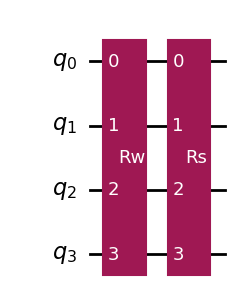

In [41]:
G(4,6).definition.draw('mpl')

### Grover's Circuit

finally, we can compose the circuit, which contains the solution $w$ as an argument of $G$

00110


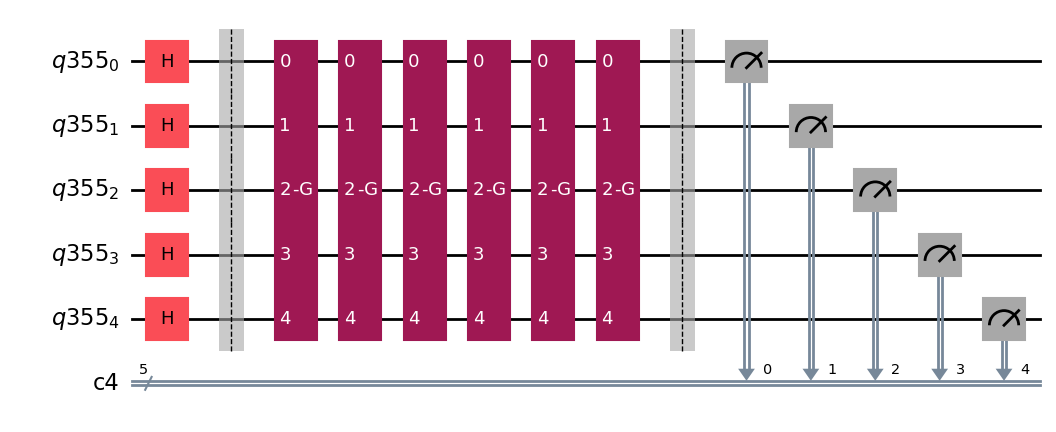

In [42]:
#### el número de cúbits de la base de datos
n=5
# el número de iteraciones de Grover
it = 6
# la solución oculta en decimal y en binario
w = 6
wstring = format(int(w), 'b').zfill(n)
print(wstring)

# el circuito de Grover
qr = QuantumRegister(n)
cr = ClassicalRegister(n)
qcGrover = QuantumCircuit(qr,cr)
qcGrover.h(qr)
qcGrover.barrier()

for i in range(it):
    qcGrover.append(G(n,w),qr)

qcGrover.barrier()

# medimos el resultado
qcGrover.measure(qr,cr)
qcGrover.draw('mpl')

{'01011': 154, '01010': 157, '11111': 142, '10110': 159, '01100': 140, '01111': 148, '11110': 141, '10111': 139, '01101': 150, '01110': 129, '10011': 152, '00101': 162, '10101': 145, '10010': 131, '00000': 119, '11010': 141, '00001': 160, '00011': 146, '10001': 151, '01000': 141, '00111': 127, '10100': 141, '11100': 129, '01001': 151, '11011': 139, '00110': 5493, '11101': 161, '10000': 148, '11001': 154, '11000': 159, '00010': 145, '00100': 146}


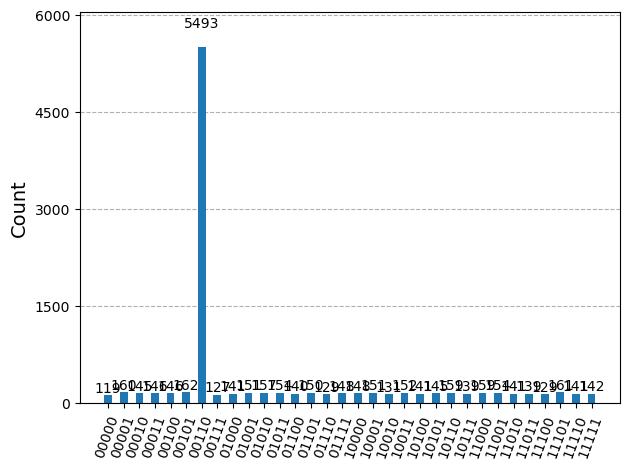

In [11]:
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile
backend = AerSimulator()

shots = 10000

counts = backend.run(transpile(qcGrover,backend),shots=shots).result().get_counts()
print(counts)


#prob_w = counts[wstring]/shots
#print(r'La probabilidad de medir w=%s es %f' % (w, prob_w))

from qiskit.visualization import plot_histogram
plot_histogram(counts)

## The Optimal Rotation

It follows from the figure illustrating the action of $G$ that each iteration produces a rotation of angle $2\theta$ where $\theta = \arcsin 1/\sqrt{N}$ is the initial angle

\begin{eqnarray}
\ket{s} &=&  \sin \theta \ket{w} + \cos  \theta \ket{s'} \nonumber\\ \rule{0mm}{5mm}
G \ket{s} &=& \sin 3\theta \ket{w} + \cos 3 \theta \ket{s'}\\ \rule{0mm}{5mm}
G^2 \ket{s} &=& \sin 5\theta \ket{w} + \cos 5 \theta \ket{s'}\\\rule{0mm}{5mm}
\vdots
\end{eqnarray}

This rotation can be represented in the form of a matrix

$$
G\ket{s} = G\begin{bmatrix}\sin\theta \\ \cos\theta\end{bmatrix} = \begin{bmatrix} \sin 2\theta & \cos 2 \theta \\ - \cos 2\theta & \sin 2\theta \end{bmatrix} \begin{bmatrix}\sin\theta \\ \cos\theta \end{bmatrix} =
\begin{bmatrix}\sin 3 \theta \\ \cos3\theta \end{bmatrix}
$$

The iteration of Grover's circuit leads to a succession of vectors

$$
G^k\ket{s} = \begin{bmatrix} \sin 2k\theta & \cos 2k \theta \\ - \cos 2k\theta & \sin 2k\theta \end{bmatrix} \begin{bmatrix}\sin\theta \\ \cos\theta \end{bmatrix} = \begin{bmatrix}\sin(2k+1)\theta  \\
\cos(2k+1)\theta \end{bmatrix}
$$
that rotate *without leaving* the plane $(\ket{w},\ket{s'})$

<div class="alert alert-block alert-success">
<b> Exercise: </b> test this equality
</div>

This rotation begins by increasing the amplitude of the state $\ket{w}$ since $\sin 3\theta > \sin \theta$. This is the desired *amplitude amplification* effect.

There will be a value of $k$ for which the iteration closely approximates the value $\sin (2k+1)\theta \approx 1$.

Higher values of $k$ lead to a suppression of this amplitude as the vector $G^k\ket{s}$ rotates away from the axis $\ket{w}$.

To determine the optimal number of iterations, we must solve the *maximum amplitude* equation

$$
\sin ((2k+1)\theta) = 1
$$

- This equation would have an easy solution 
<br>
$$
(2k+1)\theta = \frac{\pi}{2} ~~~~\Rightarrow ~~~~ k = \frac{\pi}{4\theta} - \frac{1}{2}
$$
<br>
   if $k$ were a real number.

- But it is an integer $ \Rightarrow $ the following theorem gives the **optimal solution**

<div class="alert alert-block alert-info">
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b> Theorem: </b> 
<br>
the integer value of $k\in{\mathbb Z}$ that maximizes the probability $P_k = \sin^2((2k+1)\theta)$ of measuring the solution $w$ is the integer part 
<br> 
<br>
$$
k_{op} = \left[ \frac{\pi}{4\theta} \right]
$$
<br>
 where $\theta = \arcsin \sqrt{\frac{1}{N}}$.
$~$In this case, it holds that:
<br>
$$
1 - \frac{1}{N} \leq P_{k_{op}} \leq 1\, .
$$
</div>

<div class="alert alert-block alert-success">
<b> Exercise: </b>     
execute Grover's algorithm by varying the number <i>it</i> of Grover iterations and verify that the optimal value of $k$ is as stated in the theorem.
</div>

When $N\to \infty$, that is, when our database is very large, the initial vector has a very small angle.

$$
\theta = \arcsin \frac{1}{\sqrt{N}} \to \frac{1}{\sqrt{N}} - ....
$$

to the lowest order in the power series of $1/\sqrt{N}$

<div class="alert alert-block alert-info">
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b> Theorem: </b> in the limit of $N\to\infty$ the time required by Grover's algorithm to maximally approximate the solution grows as 
<br>
<br>
$$
k_{op} \approx \frac{\pi}{4}\sqrt{N}
$$
</div>

This implies a growth of $\mathcal{O}(\sqrt{N})$ instead of $\mathcal{O}(N)$, which is what we would classically expect.

# Several Needles in a Haystack

A user might have more than one phone line contracted. In that case, *several* phone numbers will serve to find *only one* name.

We will now assume that the database search supports $M$ different satisfactory results $w_1,....,w_M$.

Now the basis vectors that *are solutions* $\{\ket{w_i} \}$ generate a *subspace* $\mathcal{B} \subset \mathcal{H}$ of dimension $M$.  

We can decompose $~\Hil = {\cal B} \oplus {\cal B}_\perp$ into a direct sum of *solution* subspaces and its orthogonal.
A vector $\ket{x}\notin {\cal B}~$ will be $~\ket{x} \in {\cal B}_\perp$

Let's define
\begin{equation}
\ket{w} = \frac{1}{\sqrt{M}}\sum_{x\in \mathcal{B}}\ket{x} = \frac{1}{\sqrt{M}}\sum_i^M \ket{w_i} \in {\cal B}
~~~~~~~,~~~~~~~~
\ket{s^\prime} = \frac{1}{\sqrt{N-M}}\sum_{x \in \mathcal{B}_\perp}\ket{x} \in {\cal B}_\perp
\end{equation}

The initial vector can be decomposed into the sum of its components *along* ${\cal B}$ and ${\cal B}_\perp$


\begin{eqnarray}
\ket{s} = \frac{1}{\sqrt{N}} \sum_{x\in \Hil} \ket{x} 
&=&  \frac{1}{\sqrt{N}} \sum_{x\in {\cal B}} \ket{x}
 +  \frac{1}{\sqrt{N}} \sum_{x\in {\cal B}_\perp} \ket{x}
\\ \rule{0mm}{12mm}
&=&\sqrt{\frac{M}{N}}\ket{w} + \sqrt{\frac{N-M}{N}}\ket{s^\prime}.
\end{eqnarray}




With these definitions, the figures in which the reflections are represented are identical and everything occurs in the *Grover plane* generated by the vectors $\{\ket{w},\ket{s'}\}$ 

The *only difference* is in the value of the initial angle 

$$
\theta = \arcsin \sqrt{\frac{M}{N}}
$$




<div class="alert alert-block alert-info">
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b> Theorem: </b> 
<br>
<br>
the integer value of $k\in{\mathbb Z}$ that maximizes the probability $P_k = \sin^2 ((2k+1)\theta)$ of measuring the solution $w$ is the integer part of $\pi/4\theta$
<br>
<br>    
$$
k_{op} = \left[ \frac{\pi}{4\theta} \right]
$$
<br>
 where $\theta = \arcsin \sqrt{\frac{M}{N}}.~$
In this case, the probability of measuring the state $\ket{w}$ is
<br>
$$
1 - \frac{M}{N} \leq P_{k_{op}} \leq 1 \, .
$$
</div>

in the limit $N\to \infty$ the computational cost still grows as the square root

<div class="alert alert-block alert-info">
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b> Theorem: </b> in the limit of $N\to\infty$ the time required by Grover's algorithm to maximally approximate some of the solutions $w_i$, grows as 
<br>
<br>
$$
k_{op} \approx \frac{\pi}{4}\sqrt{\frac{N}{M}}
$$
</div>

We see that the number of iterations that need to be performed is smaller. In return, we will only obtain a solution $w_i$ after each execution.

## The Modified Grover Circuit

the only operator we need to modify is $R_w$

In [60]:
def Rw(n,w_array): #w_array es una lista de enteros w_i en S_n  
            
    qr = QuantumRegister(n)
    qc = QuantumCircuit(qr) 
    
    for w in w_array:
        wstring = format(int(w), 'b').zfill(n)
        for i,wi in enumerate(reversed(wstring)):
            if wi == '1':
                qc.x(qr[i])
        qc.append(R0(n),qr)        
        for i,wi in enumerate(reversed(wstring)):
            if wi == '1':
                qc.x(qr[i])
    qcRw =  qc.to_gate()
    qcRw.name='Rw'
    return qcRw


Now we can run the same circuit with this modification

First, we must calculate the optimal value of iterations $k_{op} = [\pi/(4 \arcsin \sqrt{M/N})]$

In [62]:
# dimensión de la base de datos
n=4
# lista de soluciones ocultas
w_array = [1, 3, 6, 7, 15]

# valor de k óptimo
k_op = int(np.pi/(4*np.arcsin(np.sqrt(len(w_array)/2**n))))
print('k_op =',k_op)

k_op = 1


Now we build Grover's circuit with $k_{op}$ iterations.

w_i = ['0001', '0011', '0110', '0111', '1111']


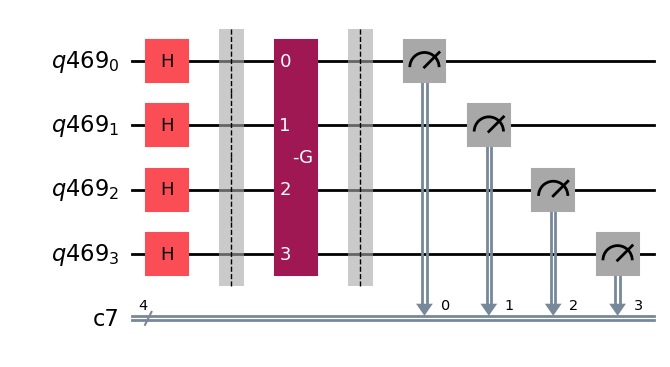

In [67]:
# pasamos las soluciones a cadenas binarias de n entradas
wstring = [format(int(w), 'b').zfill(n) for w in w_array]
print('w_i =',wstring)

qr = QuantumRegister(n)
cr = ClassicalRegister(n)
qcGrover = QuantumCircuit(qr,cr)
qcGrover.h(qr)
qcGrover.barrier()

for i in range(k_op):
    qcGrover.append(G(n,w_array),qr)

qcGrover.barrier()

qcGrover.measure(qr,cr)
qcGrover.draw('mpl')

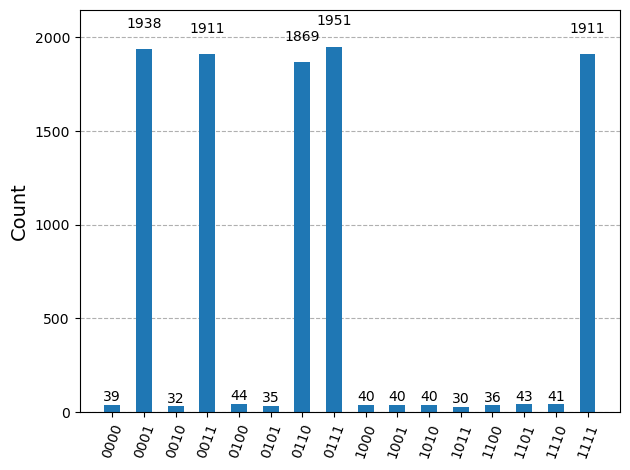

In [72]:
from qiskit_aer import AerSimulator
backend = AerSimulator()

shots = 10000
# Ejecutamos la simulación y recogemos el número de cuentas de cada estado
counts = backend.run(transpile(qcGrover,backend), shots=shots).result().get_counts()

# Calculamos la probabilidad de medir w
#prob_w = cuentas[wstring]/shots
#print(r'La probabilidad de medir w=%s es %f' % (w, prob_w))

# Histogramamos las probabilidades
from qiskit.visualization import plot_histogram
plot_histogram(counts)

We extract the values that have obtained the maximum measurement frequencies

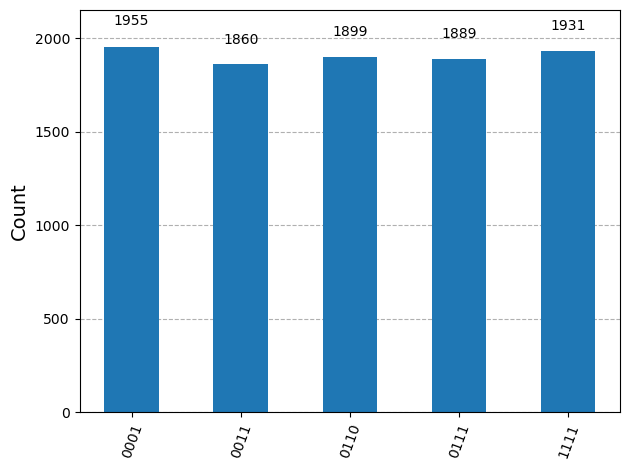

In [69]:
majority_counts = {k: v for k, v in counts.items() if  v>300 }
#print(projected_counts)
plot_histogram(majority_counts)

we convert them to decimal base

In [70]:
wi_list = sorted([int(keys,2) for  keys in majority_counts]) 
print('{Ns} ~ ', wi_list)



{Ns} ~  [1, 3, 6, 7, 15]


# Quantum Counting

In Grover's algorithm, it is crucial to know how many iterations $k$ of the operator $G$ need to be performed.

In the case of multiple solutions, this depends on $M$.

$M$ is unknown beforehand, which means the algorithm sees *its efficiency compromised*.

In this section we will explain **how to deduce** $M$ as a preliminary step, invoking the Quantum Phase Estimation algorithm.

We have already seen that, in the basis $\{|\omega\rangle, |s'\rangle\}$, we can write Grover's iteration as the rotation matrix

$$
G =
\begin{bmatrix}
\cos2\theta & \sin2\theta\\
-\sin2\theta & \cos2\theta
\end{bmatrix},
$$

where 

$$
\theta = \arcsin M/N 
$$

Knowing the value of $\theta$ would allow us to access the value of $$ M  = N\sin\theta 
$$


The eigenvalues and eigenstates of this operator are the following

$$
 \left(e^{+ 2i\theta}, \begin{bmatrix}- i \\1 \end{bmatrix}\right)~~~~,~~~~ \left( e^{- 2i\theta}, \begin{bmatrix}+ i \\1 \end{bmatrix} \right)
$$ 

which are *crying out* for the QPE algorithm, quantum phase estimation.


<div class="alert alert-block alert-success">
<b> Exercise: </b> test this result
</div>

## A Crucial Subtlety

At the time, we mentioned that the operator we encoded in Grover's circuit is not really $ R_{s_\perp}$ but rather
$R_s = -R_{s_\perp}$


Therefore, we are actually implementing the action of $ R_s R_w =  -R_{s_\perp}R_w = -G  $.



We have disregarded this global sign, yet it is relevant when making a phase estimation.

The operator $-G = G e^{i\pi}$ has eigenvalues and eigenvectors

$$
 \left(e^{+ 2i\theta + i\pi}, \begin{bmatrix}- i \\1 \end{bmatrix}\right)~~~~,~~~~ \left( e^{- 2i\theta + i\pi}, \begin{bmatrix}+ i \\1 \end{bmatrix} \right)
$$ 


Let's define the quantities $\varphi_\pm$ related to the eigenvalues of $-G$

$$
 e^{\pm  2 i \theta + i\pi} \equiv e^{2\pi i \varphi_\pm} ~~~~\Rightarrow ~~~~ {\pm  2 i \theta + i\pi}  = {2\pi i \varphi_\pm} 
$$

The phase estimation algorithm should give us a good approximation to $\varphi_\pm$, and from these two values, to

$$
\theta = \pm (\pi \varphi_\pm - \pi/2)
$$


We are going to insert $(-G)^{2^k}$ into a quantum phase estimation circuit with **$t$ counting qubits**

<center> 
<img src="./images/QuantumCounting.png" width='60%' style='margin:automatic'/>
</center>

At the output of this circuit, the phase register will be in a combination of states $\ket{m_+}$ and $\ket{m_-}$ where $m_\pm$ are distributed around the order $t$ estimators for $a_\pm = [\varphi_\pm]$

The operator $-G \in SU(2)$ since its determinant is 1. 

Therefore $$e^{2\pi i\varphi_+} e^{2\pi i\varphi_-} = 1$$

The phase estimation algorithm will give us estimates for $~~\varphi_+ = \varphi ~~$ , $~~\varphi_- = 1 - \varphi~,~~$ both belonging to the interval $[0,1)$.

In **both cases** it is immediate to verify that

$$
\frac{M}{N} \equiv \sin^2 \theta = \sin^2\left( \pi \varphi - \pi/2 \right) = \cos^2 (\pi\varphi) 
$$

From here we obtain 
$$M = N \cos^2 (\pi \varphi) = N \cos^2 (\pi (1-\varphi)) $$

To generate the QPE circuit, we need to program the *controlled* $(-G)^k$ gate $~\Rightarrow ~\cg{(-G)^{k}}$ 

In [73]:
def c_G(n,w_array,power): 
    qrG = QuantumRegister(n)
    qcG = QuantumCircuit(qrG) 

    for _ in range(power):
        qcG.append(G(n,w_array),qrG)
    
    c_mG=qcG.to_gate()
    c_mG.name="(-G)^%i" % power
    c_mG = c_mG.control()
    return c_mG


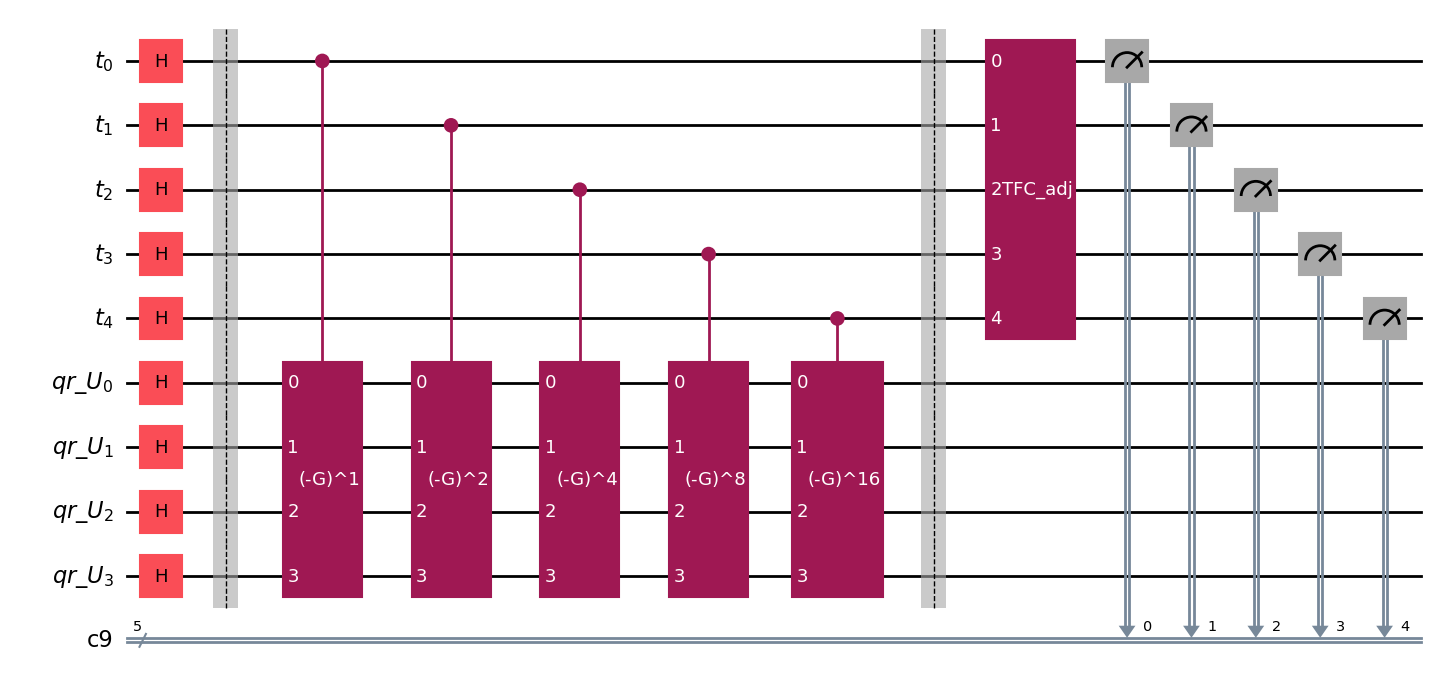

In [75]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

t = 5 # la dimensión del registro de evaluación 
n = 4 

qrt=QuantumRegister(t,name="t")
qra=QuantumRegister(n,name="qr_U") # aquí 1 es la dimensión del espacio en el que opera U
crt=ClassicalRegister(t)
qpe = QuantumCircuit(qrt,qra,crt)   

qpe.h(range(t+n))
qpe.barrier()

# aplicamos los operadores controlados c((-G)^(2^j))
for j in range(t):
    qpe.append(c_G(n,w_array,2**j),[qrt[j]]+qra[:])
    
qpe.barrier()

# aplicamos la QFT^-1 que está definida en macro.py 
qpe.append(tQ.TFC_adj(t),qrt)

qpe.measure(qrt,crt)

qpe.draw(output="mpl")

We execute the phase estimation circuit

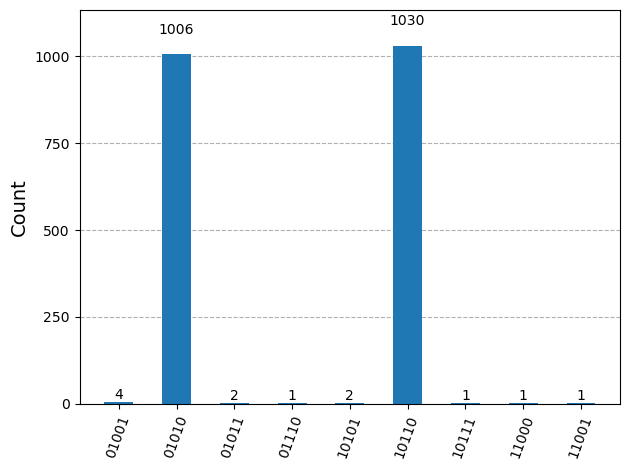

In [76]:

from qiskit.visualization import plot_histogram
counts = backend.run(transpile(qpe,backend), shots=2048).result().get_counts()
plot_histogram(counts)

We extract the outputs $m_i$ that have the maximum probability

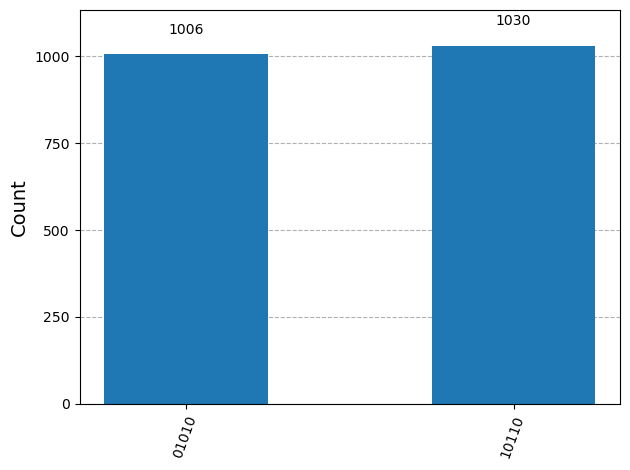

In [77]:
majority_counts = {k: v for k, v in counts.items() if  v>300 }
#print(projected_counts)
plot_histogram(majority_counts)

We convert to decimal base and extract successively
$$
m_i  ~~\longrightarrow ~~ a_i = \left[\frac{m_i}{2^t}\right] ~\approx ~\varphi_i ~~\longrightarrow ~~ M_i = [N \cos^2(\pi \varphi_i)]
$$

In [79]:
# la lista de m_i
mi_list = sorted([int(keys,2) for  keys in majority_counts]) 
print('{m_i} ~ ', mi_list)

# la lista de a_i
ai_list = [m/2**t for m in mi_list]

# la lista de M_i
Mi_list = [2**n*np.cos(np.pi*a)**2 for a in ai_list]
print('M_i=', Mi_list)

# redondeo de M_i al entero más próximo
rounded_Mi_list = [round(Mi) for Mi in Mi_list]
print(' M_i =', rounded_Mi_list)


{m_i} ~  [10, 22]
M_i= [np.float64(4.938532541079283), np.float64(4.938532541079277)]
 M_i = [5, 5]


El número de soluciones $M$ obtenidas

In [80]:
print('Number of solutions =', round(np.mean(rounded_Mi_list)))

Number of solutions = 5
